# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [4]:
# Read the XLSX file
data = pd.read_csv("data/dataset_bronze.csv")

In [5]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",05/04/2023,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",The Super Mario Bros. Movie,U.S.A.,Anglais,Long-métrage,2023.0,NaN,7 178 203 entrées,"3,1","4,1",1022 Critiques Spectateurs,NaN,Alors qu’ils tentent de réparer une canalisati...,1 866 914
1,Les Vengeances de Maître Poutifard,28/06/2023,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,France,Français,Long-métrage,2023.0,NaN,421 927 entrées,"2,0","2,0",5 articles de presse,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180 735
2,Des mains en or,07/06/2023,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",NaN,France,Français,Long-métrage,2023.0,NaN,269 253 entrées,"2,2","3,4",6 articles de presse,NaN,"François, futur académicien, est un écrivain c...",109 081
3,The Covenant,23/06/2023,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",NaN,Grande-Bretagne,Anglais,Long-métrage,2023.0,NaN,NaN,"3,1","4,1",7 articles de presse,NaN,"Lors de sa dernière mission en Afghanistan, le...",6 380 188
4,"Cléo, Melvil et moi",05/07/2023,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",NaN,France,Français,Long-métrage,2023.0,NaN,2 306 entrées,"3,3","3,2",12 articles de presse,NaN,"Dans le Paris désert du premier confinement, A...",1 849


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10416 entries, 0 to 10415
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             10416 non-null  object 
 1   date              9819 non-null   object 
 2   genre             10416 non-null  object 
 3   durée             10211 non-null  float64
 4   réalisateur       10409 non-null  object 
 5   distributeur      10416 non-null  object 
 6   acteurs           10215 non-null  object 
 7   titre_original    4097 non-null   object 
 8   nationalités      10416 non-null  object 
 9   langue_d_origine  10416 non-null  object 
 10  type_film         10416 non-null  object 
 11  annee_production  10413 non-null  float64
 12  budget            3058 non-null   object 
 13  box_office_total  8480 non-null   object 
 14  note_presse       10154 non-null  object 
 15  note_spectateurs  8492 non-null   object 
 16  nombre_article    9888 non-null   object

In [7]:
data.shape

(10416, 20)

In [52]:
print(data['box_office_total'].unique())

['360 119 entrées' '116 813 entrées' '1 688 076 entrées' ...
 '3 049 300 entrées' '39 entrées' '63 284 entrées']


## <font color="green"> || - Missing Data </font>

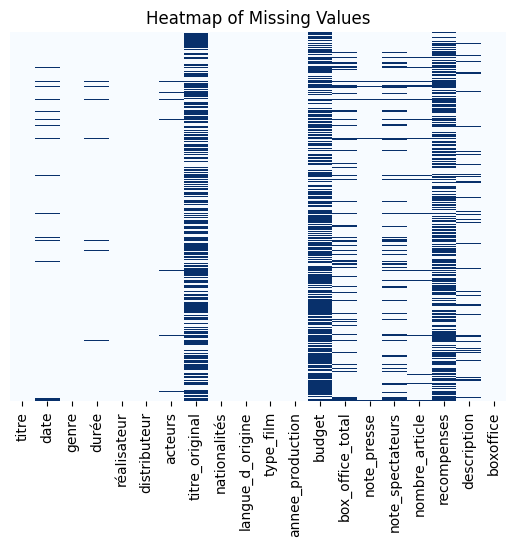

In [8]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [9]:
data.isnull().sum()

titre                  0
date                 597
genre                  0
durée                205
réalisateur            7
distributeur           0
acteurs              201
titre_original      6319
nationalités           0
langue_d_origine       0
type_film              0
annee_production       3
budget              7358
box_office_total    1936
note_presse          262
note_spectateurs    1924
nombre_article       528
recompenses         6335
description         1032
boxoffice              0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [10]:
data.duplicated().sum()

11

## <font color="green"> IV - Nettoyage Données Quantitatives </font>

In [56]:
def convert_data_types(df):
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Convertir la colonne 'durée' en type float
    df['durée'] = pd.to_numeric(df['durée'], errors='coerce')

    # Convertir la colonne 'annee_production' en type int
    df['annee_production'] = df['annee_production'].astype(int)

    # Convertir les colonnes 'note_presse' et 'note_spectateurs' en type float
    df['note_presse'] = pd.to_numeric(df['note_presse'].str.replace(',', '.'), errors='coerce')
    df['note_spectateurs'] = pd.to_numeric(df['note_spectateurs'].str.replace(',', '.'), errors='coerce')

    # Convertir la colonne 'nombre_article' en type int en gardant seulement le nombre
    df['nombre_article'] = df['nombre_article'].str.extract('(\d+)').astype(float)

      # Replace the values '-' with pd.NA
    df['budget'] = df['budget'].replace('-', pd.NA)
   
    # Use regular expressions to extract the numeric part of the 'budget' column
    df['budget'] = df['budget'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))

    # Convert the 'budget' column to a numeric type (float), handling NaN values appropriately
    df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

    # Enlever le texte dans la colonne 'box_office_total' et convertir en type int
    df['box_office_total'] = df['box_office_total'].str.replace(' ', '').str.replace('entrées', '')

    # Convert the 'box_office_total' column to type int using pd.to_numeric with errors='coerce'
    df['box_office_total'] = pd.to_numeric(df['box_office_total'], errors='coerce').astype('Int64')
    
    # Convertir la colonne 'boxoffice' en type int
    df['boxoffice'] = df['boxoffice'].str.replace(' ', '').astype(int)

    return df

In [57]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,Les Vengeances de Maître Poutifard,28/06/2023,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,"France,Belgique",Français,Long-métrage,2023,-,360 119 entrées,"2,0","2,1",5 articles de presse,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180 735
1,Le Challenge,21/06/2023,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"Jennifer Lawrence,Andrew Barth Feldman,Laura B...",No Hard Feelings,NaN,Anglais,Long-métrage,2023,-,116 813 entrées,"3,0","3,1",5 articles de presse,NaN,Maddie est sur le point de perdre sa maison d’...,54 361
2,La Petite sirène,24/05/2023,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"Halle Bailey,Cerise Calixte,Jonah Hauer-King",The Little Mermaid,NaN,Anglais,Long-métrage,2023,-,1 688 076 entrées,"2,5","2,3",20 articles de presse,NaN,"Les années 1830, dans les eaux d'une île ficti...",582 814
3,Un homme idéal,18/03/2015,NaN,97.0,Yann Gozlan,Mars Films,"Pierre Niney,Ana Girardot,André Marcon",NaN,NaN,Français,Long-métrage,2014,-,666 835 entrées,"3,2","3,8",24 articles de presse,NaN,"Mathieu, 25 ans, aspire depuis toujours à deve...",337 525
4,Mission : Impossible - Protocole fantôme,14/12/2011,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"Tom Cruise,Jeremy Renner,Simon Pegg",Mission: Impossible - Ghost Protocol,NaN,Anglais,Long-métrage,2011,140 000 000 $,2 414 279 entrées,"3,9","3,8",26 articles de presse,3 nominations,Impliquée dans l'attentat terroriste du Kremli...,827 046


In [58]:
data_propre = convert_data_types(data)

/tmp/ipykernel_28265/3767715862.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [59]:
data_propre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   titre             4913 non-null   object        
 1   date              4608 non-null   datetime64[ns]
 2   genre             3148 non-null   object        
 3   durée             4906 non-null   float64       
 4   réalisateur       4913 non-null   object        
 5   distributeur      4786 non-null   object        
 6   acteurs           4891 non-null   object        
 7   titre_original    1998 non-null   object        
 8   nationalités      1361 non-null   object        
 9   langue_d_origine  4913 non-null   object        
 10  type_film         4913 non-null   object        
 11  annee_production  4913 non-null   int64         
 12  budget            1983 non-null   float64       
 13  box_office_total  4357 non-null   Int64         
 14  note_presse       4910 n

In [60]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,"France,Belgique",Français,Long-métrage,2023,NaN,360119,2.0,2.1,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
1,Le Challenge,2023-06-21,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"Jennifer Lawrence,Andrew Barth Feldman,Laura B...",No Hard Feelings,NaN,Anglais,Long-métrage,2023,NaN,116813,3.0,3.1,5.0,NaN,Maddie est sur le point de perdre sa maison d’...,54361
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"Halle Bailey,Cerise Calixte,Jonah Hauer-King",The Little Mermaid,NaN,Anglais,Long-métrage,2023,NaN,1688076,2.5,2.3,20.0,NaN,"Les années 1830, dans les eaux d'une île ficti...",582814
3,Un homme idéal,2015-03-18,NaN,97.0,Yann Gozlan,Mars Films,"Pierre Niney,Ana Girardot,André Marcon",NaN,NaN,Français,Long-métrage,2014,NaN,666835,3.2,3.8,24.0,NaN,"Mathieu, 25 ans, aspire depuis toujours à deve...",337525
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"Tom Cruise,Jeremy Renner,Simon Pegg",Mission: Impossible - Ghost Protocol,NaN,Anglais,Long-métrage,2011,140000000.0,2414279,3.9,3.8,26.0,3 nominations,Impliquée dans l'attentat terroriste du Kremli...,827046


In [101]:
data.isnull().sum()

titre                  0
date                 305
genre                  0
durée                  7
réalisateur            0
distributeur         127
acteurs               22
titre_original      2915
nationalités           0
langue_d_origine       0
type_film              0
annee_production       0
budget              2930
box_office_total     556
note_presse            3
note_spectateurs     330
nombre_article        15
description          518
boxoffice              0
awards                 0
nominations            0
lng_Org_FR             0
lng_Org_ANG            0
lng_Org_AR             0
Autre_lang             0
Action                 0
Drame                  0
Comédie                0
fantasy_scifi          0
other_genres           0
dtype: int64

In [100]:
print(data_propre['type_film'].unique())

['Long-métrage' 'Télefilm' 'Film à sketches']


In [62]:
print(data_propre['box_office_total'].unique())

<IntegerArray>
[ 360119,  116813, 1688076,  666835, 2414279,   87911, 2294174,    <NA>,
   70862, 1385302,
 ...
   67643,  170106,  349427,   56020,  486068,      20,   84371, 3049300,
      39,   63284]
Length: 4260, dtype: Int64


In [63]:
data_propre.shape

(4913, 20)

## <font color="green"> V - Nettoyage Données Qualitatives </font>

In [64]:
print(data_propre['langue_d_origine'].unique())

['Français' 'Anglais' 'Italien' 'Anglais, Japonais' 'Japonais' 'Espagnol'
 'Français, Anglais' 'Anglais, Français' 'Arabe, Français, Portugais'
 'Français, Algérien' 'Russe' 'Espagnol, Français, Gaélique' 'Coréen'
 'Allemand' 'Arabe, Français' 'Perse' 'Français, Arabe'
 'Anglais, Allemand, Français' 'Anglais, Espagnol'
 'Allemand, Anglais, Français, Hongrois' 'Français, Allemand, Anglais'
 'Français, Allemand' 'Anglais, Cantonais, Mandarin' 'Urdu' 'Muet'
 'Chinois' 'Arabe' 'Anglais, Français, Italien'
 'Japonais, Coréen, Langue des signes' 'Français, Arabe, Somalien'
 'Espagnol, Anglais' 'Néerlandais' 'Algérien, Français' 'Turc'
 'Chinois, Japonais, Cantonais' 'Anglais, Suédois' 'Portugais' 'Hongrois'
 'Japonais, Chinois' 'Hebreu, Roumain, Français, Allemand'
 'Anglais, Allemand' 'Anglais, Russe' 'Anglais, Français, Allemand'
 'Islandais, Danois' 'Kazakh' 'Gaélique' 'Norvégien' 'Danois'
 'Norvégien, Urdu' 'Français, Bengali'
 'Anglais, Japonais, Français, Allemand' 'Français, Anglais, 

In [69]:
# Split the values in the 'nationalités' column by commas and create a list of nationalities
data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Flatten the list of nationalities and remove leading/trailing whitespaces
data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: [nationality.strip() for nationality in x])

In [72]:
def nettoyage_qualita(df):
    # Clean 'titre' column by removing leading/trailing whitespaces
    df['titre'] = df['titre'].str.strip()
    # Clean 'genre' column by filling missing values with an appropriate placeholder (e.g., 'Unknown')
    # Clean 'genre' column by replacing missing values with NaN
    df['genre'] = df['genre'].replace('', np.nan)
    
    df['réalisateur'] = df['réalisateur'].str.strip()
    # Clean 'distributeur' column by removing leading/trailing whitespaces
    df['distributeur'] = df['distributeur'].str.strip()
    # Clean 'acteurs' column by splitting the names into a list
    df['acteurs'] = df['acteurs'].str.split(',')
    # Clean 'langue_d_origine' column by removing leading/trailing whitespaces
    df['langue_d_origine'] = df['langue_d_origine'].str.strip()
    # Clean 'type_film' column by filling missing values with 'Unknown'
    df['type_film'] = df['type_film'].replace('', np.nan)
    # Clean 'description' column by removing leading/trailing whitespaces
    df['description'] = df['description'].str.strip()

    return df

In [73]:
propre_data = nettoyage_qualita(data_propre)

In [74]:
propre_data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,...,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,awards,nominations
0,Les Vengeances de Maître Poutifard,2023-06-28,Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"[Christian Clavier, Isabelle Nanty, Jennie-Ann...",NaN,"[France, Belgique]",Français,...,2023,NaN,360119,2.0,2.1,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,0,0
1,Le Challenge,2023-06-21,NaN,103.0,Gene Stupnitsky,Sony Pictures Releasing France,"[Jennifer Lawrence, Andrew Barth Feldman, Laur...",No Hard Feelings,[],Anglais,...,2023,NaN,116813,3.0,3.1,5.0,Maddie est sur le point de perdre sa maison d’...,54361,0,0
2,La Petite sirène,2023-05-24,"Famille,Fantastique",136.0,Rob Marshall,The Walt Disney Company France,"[Halle Bailey, Cerise Calixte, Jonah Hauer-King]",The Little Mermaid,[],Anglais,...,2023,NaN,1688076,2.5,2.3,20.0,"Les années 1830, dans les eaux d'une île ficti...",582814,0,0
3,Un homme idéal,2015-03-18,NaN,97.0,Yann Gozlan,Mars Films,"[Pierre Niney, Ana Girardot, André Marcon]",NaN,[],Français,...,2014,NaN,666835,3.2,3.8,24.0,"Mathieu, 25 ans, aspire depuis toujours à deve...",337525,0,0
4,Mission : Impossible - Protocole fantôme,2011-12-14,"Espionnage,Thriller",133.0,Brad Bird,Paramount Pictures France,"[Tom Cruise, Jeremy Renner, Simon Pegg]",Mission: Impossible - Ghost Protocol,[],Anglais,...,2011,140000000.0,2414279,3.9,3.8,26.0,Impliquée dans l'attentat terroriste du Kremli...,827046,0,3


In [75]:
# Filtrer les lignes avec la langue 'anglais'
colonnes_anglais = propre_data2[propre_data2['langue_d_origine'].str.contains('Anglais', case=False, na=False)]

# Afficher les colonnes où la langue contient 'anglais'
print(colonnes_anglais)

                                               titre       date  \
1                                       Le Challenge 2023-06-21   
2                                   La Petite sirène 2023-05-24   
4           Mission : Impossible - Protocole fantôme 2011-12-14   
6                                   Fast & Furious X 2023-05-17   
7                        L'Extraordinaire Mr. Rogers        NaT   
...                                              ...        ...   
4906              Une merveilleuse histoire du temps 2015-01-21   
4908  Star Wars : Episode III - La Revanche des Sith 2005-05-18   
4909                                    Spider-Man 3 2007-01-05   
4911                                      Spider-Man 2002-12-06   
4912                          Arthur et les Minimoys 2006-11-29   

                             genre  durée      réalisateur  \
1                              NaN  103.0  Gene Stupnitsky   
2              Famille,Fantastique  136.0     Rob Marshall   
4        

In [80]:
# Fill NaN values in 'genre' column with an empty list
propre_data2['genre'].fillna("", inplace=True)

# Convertir la colonne 'genre' en une liste de genres distincts pour chaque film
propre_data2['genres'] = propre_data2['genre'].str.split(',')

# Créer un dictionnaire avec tous les genres uniques en tant que clés, et des listes de 0 et 1 comme valeurs
genres_dict = {}
for genres_list in propre_data2['genres']:
    for genre in genres_list:
        genre = genre.strip()  # Supprimer les espaces en début et fin de genre
        if genre not in genres_dict:
            genres_dict[genre] = []

In [85]:
nationnalité_individual = propre_data2['nationalités'].explode()

# Éliminer les doublons pour obtenir les genres uniques
nationnalité_uniques = nationnalité_individual.drop_duplicates()

In [86]:
nationnalité_uniques.shape

(97,)

In [87]:
# Split the values in the 'nationalités' column by commas and create a list of nationalities
propre_data2['langue_d_origine'] = propre_data2['langue_d_origine'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

In [88]:
langue_d_origine_gh = propre_data2['langue_d_origine'].explode()

# Éliminer les doublons pour obtenir les genres uniques
langue_d_origine_gh = langue_d_origine_gh.drop_duplicates()

In [89]:
langue_d_origine_gh.shape

(119,)

In [90]:
langue_d_origine_gh.to_csv('langue_d_origine_gh.csv', index=False)

## <font color="green"> VI- Export silver Data </font>

In [91]:
# Sauvegarder les genres uniques dans un fichier CSV
nationnalité_uniques.to_csv('nationnalité_uniques.csv', index=False)

In [92]:
#EXporter la data dans un Csv 
data_propre.to_csv('data/dataset_silver.csv', index=False)